## **Práctica 14: Clasificación múltiple (cardiotocograma)**

Nombre:

No. Cuenta:

Email:

### **Caso de estudio**

**Objetivo.** Clasificar los exámenes de cardiotocograma que fueron clasificados en tres clases: Normal, Sospecha y Patológico.


**Contexto**

La reducción de la mortalidad infantil es un indicador clave del progreso humano.
La ONU espera que para 2030, los países pongan fin a las muertes 'prevenibles' de recién nacidos y niños menores de 5 años. El objetivo de reducir la mortalidad de menores de 5 años al menos a 25 por cada 1000 nacidos vivos.

Por lo anterior, los cardiotocogramas (CTG) son una opción económicamente accesible para evaluar la salud fetal, lo que permite a los profesionales de la salud tomar medidas para prevenir la mortalidad infantil y materna. El equipo funciona enviando pulsos de ultrasonido y leyendo la frecuencia cardíaca fetal (FCF), los movimientos fetales, las contracciones uterinas y otros.

**Datos**

El conjunto de datos contiene 2126 registros de características extraídas de exámenes de cardiotocograma, que luego fueron clasificados por obstetras expertos en 3 clases:

1) Normal
2) Suspect (Sospecha)
3) Pathological (Patológico)

**Fuente de datos:**

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/code

https://archive.ics.uci.edu/ml/datasets/cardiotocography

**Variables:**

* 1) baseline value: Frecuencia cardíaca fetal inicial (FHR)
* 2) accelerations: Número de aceleraciones por segundo.
* 3) fetal_movement: Número de movimientos fetales por segundo.
* 4) uterine_contractions: Número de contracciones uterinas por segundo.
* 5) light_decelerations: Número de desaceleraciones de luz por segundo.
* 6) severe_decelerations: Número de deceleraciones severas por segundo.
* 7) prolongued_decelerations: Número de deceleraciones prolongadas por segundo.
* 8) abnormal_short_term_variability: Porcentaje de tiempo con variabilidad anormal a corto plazo.
* 9) mean_value_of_short_term_variability: Valor medio de la variabilidad a corto plazo.
* 10) percentage_of_time_with_abnormal_long_term_variability: Porcentaje de tiempo con variabilidad anormal a largo plazo. 
* 11) mean_value_of_long_term_variability: Valor medio de la variabilidad a largo plazo.
* 12) histogram_width: Ancho del histograma basado en todos los valores de un registro.
* 13) histogram_min: Valor mínimo del histograma.
* 14) histogram_max: Valor máximo del histograma.
* 15) histogram_number_of_peaks: Número de picos en el histograma.
* 16) histogram_number_of_zeroes: Número de ceros en el histograma.
* 17) histogram_mode: Moda del histograma.
* 18) histogram_mean: Media del histograma.
* 19) histogram_median: Mediana del histograma.
* 20) histogram_variance: Varianza del histograma.
* 21) histogram_tendency: Tendencia del histograma.
* 22) fetal_health: Salud fetal (1-Normal, 2-Suspect, 3-Pathological)

### **I. Acceso a datos y selección de características**

#### **1) Acceso a los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [2]:
CardioFetal = pd.read_csv('Datos/fetal_health.csv')
CardioFetal

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
CardioFetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
print(CardioFetal.groupby('fetal_health').size())

fetal_health
1.0    1655
2.0     295
3.0     176
dtype: int64


In [5]:
CardioFetal.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


#### **2) Selección de características**

A través de un mapa de calor de identifican posibles variables correlacionadas.

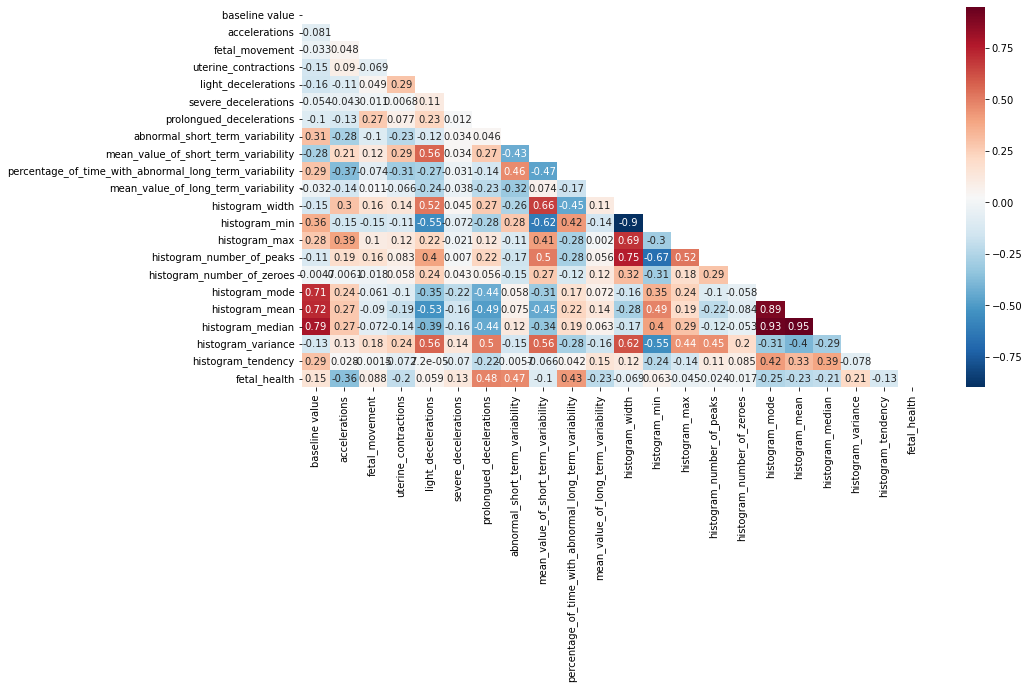

In [6]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CardioFetal.corr())
sns.heatmap(CardioFetal.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Varibles seleccionadas:**

Debido a la importancia de las variables, se considerarán todas las variables para la construcción de los modelos.

#### **3) Definición de las variables predictoras y variable clase**


In [7]:
#Variables predictoras
X = np.array(CardioFetal[['baseline value',
                          'accelerations',
                          'fetal_movement',
                          'uterine_contractions',
                          'light_decelerations',
                          'severe_decelerations',
                          'prolongued_decelerations',
                          'abnormal_short_term_variability',
                          'mean_value_of_short_term_variability',
                          'percentage_of_time_with_abnormal_long_term_variability',
                          'mean_value_of_long_term_variability',
                          'histogram_width',
                          'histogram_min',
                          'histogram_max',
                          'histogram_number_of_peaks',
                          'histogram_number_of_zeroes', 
                          'histogram_mode',
                          'histogram_mean',
                          'histogram_median',
                          'histogram_variance',
                          'histogram_tendency']])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [8]:
#Variable clase
Y = np.array(CardioFetal[['fetal_health']])
pd.DataFrame(Y)

,0
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2121,2.0
2122,2.0
2123,2.0
2124,2.0


### **II. Creación de los modelos**

In [9]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [10]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [11]:
print(len(X_train))
print(len(X_validation))

1700
426


### **Modelo 1: Árboles de decisión (AD)**

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
#Se entrena el modelo a partir de los datos de entrada
ClasificacionAD = DecisionTreeClassifier(random_state=0)
ClasificacionAD.fit(X_train, Y_train)

#ClasificacionAD = DecisionTreeClassifier(min_samples_split=8, 
#                                         min_samples_leaf=4,
#                                         random_state=0)
#ClasificacionAD.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
#Clasificación final 
Y_ClasificacionAD = ClasificacionAD.predict(X_validation)
print(Y_ClasificacionAD)

[1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 3.
 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 3. 1. 1. 2. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1.
 1. 1. 1. 2. 1. 1. 1. 3. 2. 2. 1. 1. 3. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 3. 2. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 2. 2. 3. 1. 2. 1. 1. 1. 1. 1. 1. 2.
 1. 2. 3. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 2. 1. 1. 1. 1. 3. 1. 2. 2. 1. 1.
 1. 1. 1. 1. 3. 1. 1. 3. 1. 3. 3. 1. 3. 1. 1. 1. 1. 2. 1. 1. 1. 3. 1. 2.
 1. 1. 2. 1. 1. 1. 3. 1. 1. 1. 1. 2. 3. 1. 1. 2. 1. 1. 1. 1. 3. 2. 1. 1.
 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 3. 1. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 3. 1. 3. 1. 3. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3.
 1. 2. 1. 2. 2. 3. 1. 1. 3. 1. 3. 3. 1. 1. 1. 3. 1. 3. 1. 2. 1. 3. 1. 1.
 1. 1. 2. 1. 1. 1. 1. 3. 1. 1. 1. 1. 2. 1. 1. 1. 1.

In [15]:
ValoresMod1 = pd.DataFrame(Y_validation, Y_ClasificacionAD)
ValoresMod1

,0
1.0,1.0
1.0,1.0
1.0,1.0
1.0,1.0
2.0,2.0
...,...
2.0,2.0
1.0,1.0
1.0,1.0
1.0,1.0


In [16]:
accuracy_score(Y_validation, Y_ClasificacionAD)

0.9413145539906104

#### **Matriz de clasificación: Árbol de decisión**

In [17]:
#Matriz de clasificación
ModeloClasificacion1 = ClasificacionAD.predict(X_validation)
Matriz_Clasificacion1 = pd.crosstab(Y_validation.ravel(), 
                                   ModeloClasificacion1, 
                                   rownames=['Actual'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion1

Clasificación,1.0,2.0,3.0
Actual,,,
1.0,318,8,0
2.0,11,45,2
3.0,2,2,38


In [18]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionAD.criterion)
print('Importancia variables: \n', ClasificacionAD.feature_importances_)
print("Exactitud:", accuracy_score(Y_validation, Y_ClasificacionAD))
print(classification_report(Y_validation, Y_ClasificacionAD))

Criterio: 
 gini
Importancia variables: 
 [0.03552509 0.0276435  0.01066513 0.02485075 0.00566244 0.
 0.02056408 0.12529116 0.26726477 0.13680067 0.01805581 0.02871576
 0.01071973 0.01929437 0.01156631 0.00446095 0.01039953 0.20581616
 0.01930685 0.01523042 0.0021665 ]
Exactitud: 0.9413145539906104
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       326
         2.0       0.82      0.78      0.80        58
         3.0       0.95      0.90      0.93        42

    accuracy                           0.94       426
   macro avg       0.91      0.89      0.90       426
weighted avg       0.94      0.94      0.94       426



In [19]:
ImportanciaMod1 = pd.DataFrame({'Variable': list(CardioFetal[['baseline value',
                                                              'accelerations',
                                                              'fetal_movement',
                                                              'uterine_contractions',
                                                              'light_decelerations',
                                                              'severe_decelerations',
                                                              'prolongued_decelerations',
                                                              'abnormal_short_term_variability',
                                                              'mean_value_of_short_term_variability',
                                                              'percentage_of_time_with_abnormal_long_term_variability',
                                                              'mean_value_of_long_term_variability',
                                                              'histogram_width',
                                                              'histogram_min',
                                                              'histogram_max',
                                                              'histogram_number_of_peaks',
                                                              'histogram_number_of_zeroes',
                                                              'histogram_mode',
                                                              'histogram_mean',
                                                              'histogram_median',
                                                              'histogram_variance',
                                                              'histogram_tendency']]),
                                'Importancia': ClasificacionAD.feature_importances_}).sort_values('Importancia', ascending=False)
ImportanciaMod1

,Variable,Importancia
8,mean_value_of_short_term_variability,0.267265
17,histogram_mean,0.205816
9,percentage_of_time_with_abnormal_long_term_var...,0.136801
7,abnormal_short_term_variability,0.125291
0,baseline value,0.035525
11,histogram_width,0.028716
1,accelerations,0.027644
3,uterine_contractions,0.024851
6,prolongued_decelerations,0.020564
18,histogram_median,0.019307


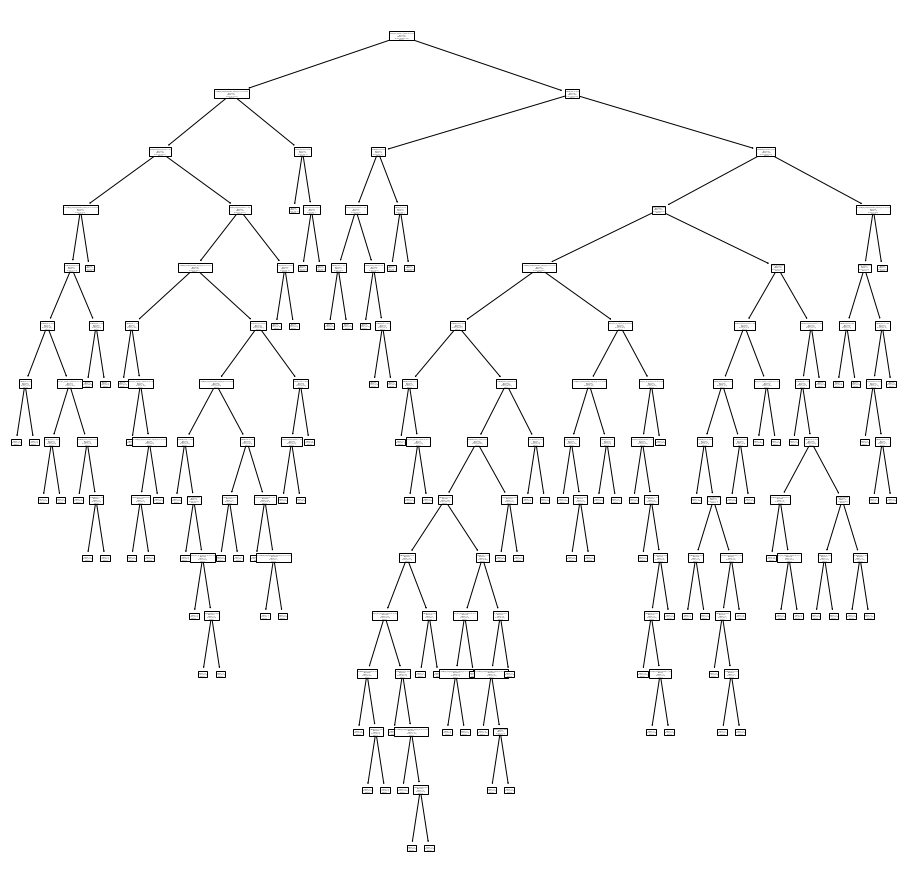

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(ClasificacionAD, 
          feature_names = ['baseline value',
                           'accelerations',
                           'fetal_movement',
                           'uterine_contractions',
                           'light_decelerations',
                           'severe_decelerations',
                           'prolongued_decelerations',
                           'abnormal_short_term_variability',
                           'mean_value_of_short_term_variability',
                           'percentage_of_time_with_abnormal_long_term_variability',
                           'mean_value_of_long_term_variability',
                           'histogram_width',
                           'histogram_min',
                           'histogram_max',
                           'histogram_number_of_peaks',
                           'histogram_number_of_zeroes',
                           'histogram_mode',
                           'histogram_mean',
                           'histogram_median',
                           'histogram_variance',
                           'histogram_tendency'],
         class_names = ['1', '2', '3'])
plt.show()

In [20]:
from sklearn.tree import export_text
Reporte = export_text(ClasificacionAD, feature_names = ['baseline value',
                                                        'accelerations',
                                                        'fetal_movement',
                                                        'uterine_contractions',
                                                        'light_decelerations',
                                                        'severe_decelerations',
                                                        'prolongued_decelerations',
                                                        'abnormal_short_term_variability',
                                                        'mean_value_of_short_term_variability',
                                                        'percentage_of_time_with_abnormal_long_term_variability',
                                                        'mean_value_of_long_term_variability',
                                                        'histogram_width',
                                                        'histogram_min',
                                                        'histogram_max',
                                                        'histogram_number_of_peaks',
                                                        'histogram_number_of_zeroes',
                                                        'histogram_mode',
                                                        'histogram_mean',
                                                        'histogram_median',
                                                        'histogram_variance',
                                                        'histogram_tendency'])
print(Reporte)

|--- mean_value_of_short_term_variability <= 0.55
|   |--- percentage_of_time_with_abnormal_long_term_variability <= 68.50
|   |   |--- abnormal_short_term_variability <= 59.50
|   |   |   |--- percentage_of_time_with_abnormal_long_term_variability <= 61.00
|   |   |   |   |--- histogram_variance <= 4.50
|   |   |   |   |   |--- histogram_min <= 101.50
|   |   |   |   |   |   |--- histogram_min <= 82.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- histogram_min >  82.50
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- histogram_min >  101.50
|   |   |   |   |   |   |--- mean_value_of_short_term_variability <= 0.45
|   |   |   |   |   |   |   |--- histogram_median <= 154.00
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- histogram_median >  154.00
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |--- mean_value_of_short_term_variability >  0.45
|   |   |   |   |   |   |   |--- histogr

### **Modelo 2: Bosques aleatorios (BA)**

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
ClasificacionBA = RandomForestClassifier(random_state=0)
ClasificacionBA.fit(X_train, Y_train)

#ClasificacionBA = RandomForestClassifier(n_estimators=100,
#                                         max_depth=11, 
#                                         min_samples_split=4, 
#                                         min_samples_leaf=2, 
#                                         random_state=0)
#ClasificacionBA.fit(X_train, Y_train)

/var/folders/zt/hwmt64750_zczdg8t3gmqjgh0000gn/T/ipykernel_68460/4184477576.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ClasificacionBA.fit(X_train, Y_train)


RandomForestClassifier(random_state=0)

In [23]:
#Clasificación final 
Y_ClasificacionBA = ClasificacionBA.predict(X_validation)
print(Y_ClasificacionBA)

[1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 3.
 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 3. 1. 1. 2. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 2. 1. 1. 1. 3. 2. 2. 1. 1. 3. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1.
 3. 2. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 2. 2. 3. 1. 2. 1. 1. 1. 1. 2. 1. 2.
 1. 2. 3. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 3. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 2. 2. 1. 1.
 1. 1. 1. 1. 3. 2. 1. 3. 1. 1. 3. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 3. 1. 1.
 1. 1. 2. 1. 1. 1. 3. 1. 1. 1. 1. 2. 3. 1. 1. 2. 1. 1. 1. 1. 3. 1. 1. 1.
 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 3. 1. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 3. 1. 3. 1. 3. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3.
 1. 2. 1. 2. 1. 3. 1. 1. 3. 1. 3. 3. 1. 1. 1. 3. 1. 3. 1. 2. 1. 3. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 2. 1. 1. 1. 1.

In [24]:
ValoresMod2 = pd.DataFrame(Y_validation, Y_ClasificacionBA)
ValoresMod2

,0
1.0,1.0
1.0,1.0
1.0,1.0
1.0,1.0
2.0,2.0
...,...
2.0,2.0
1.0,1.0
1.0,1.0
1.0,1.0


In [25]:
accuracy_score(Y_validation, Y_ClasificacionBA)

0.9413145539906104

#### **Matriz de clasificación: Bosques aleatorios**

In [26]:
#Matriz de clasificación
ModeloClasificacion2 = ClasificacionBA.predict(X_validation)
Matriz_Clasificacion2 = pd.crosstab(Y_validation.ravel(),
                                    ModeloClasificacion2,
                                    rownames=['Reales'],
                                    colnames=['Clasificación']) 
Matriz_Clasificacion2

Clasificación,1.0,2.0,3.0
Reales,,,
1.0,319,5,2
2.0,13,44,1
3.0,1,3,38


In [27]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionBA.criterion)
print('Importancia variables: \n', ClasificacionBA.feature_importances_)
print("Exactitud:", accuracy_score(Y_validation, Y_ClasificacionBA))
print(classification_report(Y_validation, Y_ClasificacionBA))

Criterio: 
 gini
Importancia variables: 
 [0.03952282 0.05111938 0.01652313 0.03702051 0.00736119 0.00018172
 0.04658471 0.15827439 0.10316906 0.13502903 0.04649967 0.03826981
 0.03986485 0.02898141 0.0185002  0.00447489 0.05159279 0.08563141
 0.05057901 0.03279502 0.00802499]
Exactitud: 0.9413145539906104
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       326
         2.0       0.85      0.76      0.80        58
         3.0       0.93      0.90      0.92        42

    accuracy                           0.94       426
   macro avg       0.91      0.88      0.89       426
weighted avg       0.94      0.94      0.94       426



In [28]:
Importancia2 = pd.DataFrame({'Variable': list(CardioFetal[['baseline value',
                                                           'accelerations',
                                                           'fetal_movement',
                                                           'uterine_contractions',
                                                           'light_decelerations',
                                                           'severe_decelerations',
                                                           'prolongued_decelerations',
                                                           'abnormal_short_term_variability',
                                                           'mean_value_of_short_term_variability',
                                                           'percentage_of_time_with_abnormal_long_term_variability',
                                                           'mean_value_of_long_term_variability',
                                                           'histogram_width',
                                                           'histogram_min',
                                                           'histogram_max',
                                                           'histogram_number_of_peaks',
                                                           'histogram_number_of_zeroes',
                                                           'histogram_mode',
                                                           'histogram_mean',
                                                           'histogram_median',
                                                           'histogram_variance',
                                                           'histogram_tendency']]), 
                             'Importancia': ClasificacionBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia2

,Variable,Importancia
7,abnormal_short_term_variability,0.158274
9,percentage_of_time_with_abnormal_long_term_var...,0.135029
8,mean_value_of_short_term_variability,0.103169
17,histogram_mean,0.085631
16,histogram_mode,0.051593
1,accelerations,0.051119
18,histogram_median,0.050579
6,prolongued_decelerations,0.046585
10,mean_value_of_long_term_variability,0.046500
12,histogram_min,0.039865


### **III. Validación**


In [29]:
print("Árbol de decisión:", accuracy_score(Y_validation, Y_ClasificacionAD))
print("Bosque aleatorio:", accuracy_score(Y_validation, Y_ClasificacionBA))

Árbol de decisión: 0.9413145539906104
Bosque aleatorio: 0.9413145539906104


In [30]:
#Rendimiento
from sklearn.preprocessing import label_binarize
y_score = ClasificacionBA.predict_proba(X_validation)
y_test_bin = label_binarize(Y_validation, classes=[1, 
                                                   2, 
                                                   3])
n_classes = y_test_bin.shape[1]

AUC para la clase 1: 0.9835582822085889
AUC para la clase 2: 0.9631980884557722
AUC para la clase 3: 0.9823908730158731


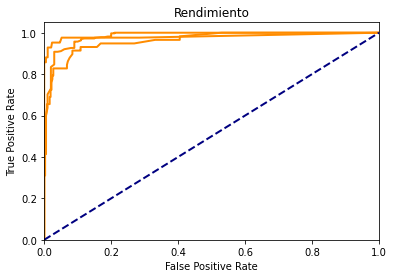

In [31]:
#Se calcula la curva ROC y el área bajo la curva para cada clase
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC para la clase {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rendimiento')
plt.show()

### **IV. Nuevas clasificaciones**


In [32]:
#Paciente
Paciente = pd.DataFrame({'baseline value': [120],
                         'accelerations': [0],
                         'fetal_movement': [0],
                         'uterine_contractions': [0],
                         'light_decelerations': [0],
                         'severe_decelerations': [0],
                         'prolongued_decelerations': [0],
                         'abnormal_short_term_variability': [73],
                         'mean_value_of_short_term_variability': [0.5],
                         'percentage_of_time_with_abnormal_long_term_variability': [43],
                         'mean_value_of_long_term_variability': [2.4],
                         'histogram_width': [64],
                         'histogram_min': [62],
                         'histogram_max': [126],
                         'histogram_number_of_peaks': [2],
                         'histogram_number_of_zeroes': [0],
                         'histogram_mode': [120],
                         'histogram_mean': [137],
                         'histogram_median': [121],
                         'histogram_variance': [73],
                         'histogram_tendency': [1]})
ClasificacionBA.predict(Paciente)

/Users/guillermo-molero/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([2.])